In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the Data

In [4]:
df_abt = pd.read_excel('../data/churn_data.xlsx')
df_abt.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
df_abt["TotalCharges"] = pd.to_numeric(df_abt["TotalCharges"],errors='coerce')

In [82]:
df_abt = df_abt.dropna()

In [83]:
df_abt.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Train-Test Split

In [84]:
cat_vars = ['PhoneService',"Contract","PaperlessBilling","PaymentMethod"]
num_vars = ["tenure","MonthlyCharges","TotalCharges"]
modeling_vars = cat_vars + num_vars

In [85]:
X = df_abt.filter(modeling_vars).copy()
y = df_abt['Churn'].copy()
y = pd.DataFrame(y)

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn) 
y.Churn = le.transform(y.Churn)

In [87]:
X = pd.get_dummies(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Feature Engineering

In [89]:
X_train

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
3948,56,88.90,4968.00,0,1,0,1,0,1,0,1,0,0,0
4938,17,89.40,1539.45,0,1,1,0,0,0,1,0,0,1,0
3643,53,19.05,990.45,0,1,0,1,0,1,0,0,1,0,0
2141,16,20.15,341.35,0,1,1,0,0,1,0,0,0,1,0
669,70,57.80,4039.30,1,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,1,69.20,69.20,0,1,1,0,0,0,1,0,0,1,0
4448,30,99.70,2967.35,0,1,1,0,0,0,1,0,0,1,0
5726,47,21.30,1041.80,0,1,0,0,1,0,1,1,0,0,0
2891,1,79.70,79.70,0,1,1,0,0,0,1,0,0,1,0


In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
lr.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [92]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
5325,5,20.55,99.45,0,1,0,1,0,1,0,0,0,1,0,0,0
4608,55,77.80,4323.35,0,1,0,0,1,0,1,1,0,0,0,0,0
3815,3,74.25,210.30,0,1,1,0,0,0,1,0,0,1,0,1,1
3902,1,29.90,29.90,1,0,1,0,0,1,0,0,0,0,1,0,0
3659,67,109.90,7332.40,0,1,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,65,95.50,6153.85,0,1,0,1,0,0,1,0,0,1,0,0,0
2992,12,34.00,442.45,1,0,1,0,0,1,0,0,0,0,1,0,0
5309,61,20.25,1278.80,0,1,0,0,1,1,0,0,1,0,0,0,0
3529,2,74.20,140.10,0,1,1,0,0,0,1,0,0,1,0,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


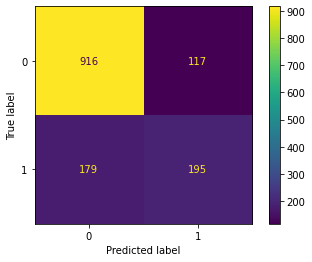

In [93]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test, values_format='d');

In [94]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.7971194879089616
Acurácia (Teste): 0.7896233120113717
Acurácia Balanceada (Treino): 0.7116301128084168
Acurácia Balanceada (Teste): 0.7040640158201801
Precision (Treino): 0.6441368078175895
Precision (Teste): 0.625
Recall (Treino): 0.5290969899665552
Recall (Teste): 0.5213903743315508
F1-Score (Treino): 0.5809768637532133
F1-Score (Teste): 0.5685131195335277
ROCAUC (Treino): 0.8398489029792535
ROCAUC (Teste): 0.8230311485678494


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


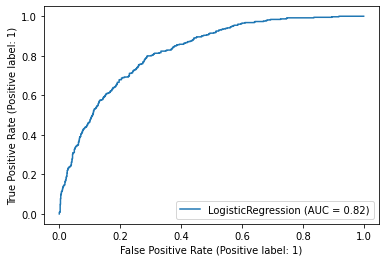

In [95]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X_test, y_test);

In [96]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.797119,0.711630,0.644137,0.529097,0.580977,0.839849
1,Logistic Regression,teste,0.789623,0.704064,0.625000,0.521390,0.568513,0.823031
